In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Read image and threshold it (0 is the line, 1 is the backgroud)

<IPython.core.display.Javascript object>


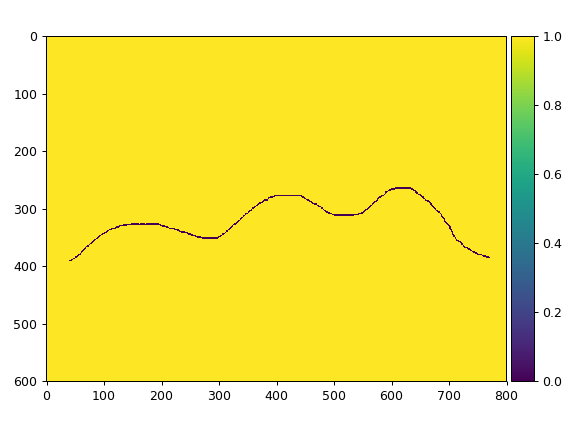

/home/nitred/anaconda2/envs/img2line/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


In [2]:
imgarr = imread("./line.png", as_grey=True)
imgarr[imgarr < 0.5] = 0
imgarr[imgarr >= 0.5] = 1
plt.figure()
imshow(imgarr)
plt.show()

# Extract x and y coordinates of the line from the image

<IPython.core.display.Javascript object>


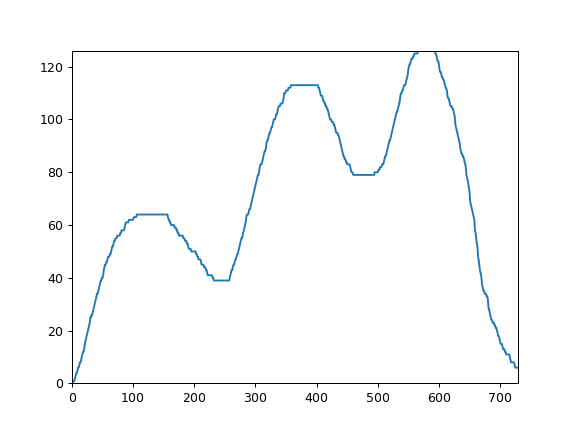

In [3]:
imgarrflip = imgarr[::-1]  # bottom left = 0,0
colmin = np.min(imgarrflip, axis=0)  # minimum values of every column
x_min = np.argmin(colmin)  # searching for first zero from the start
x_max = len(colmin) - np.argmin(colmin[::-1], axis=0) - 1 # searching for first zero from the last
x = np.arange(x_min, x_max + 1)  # + 1 to include x_max as well
y = np.argmin(imgarrflip[:, x], axis=0)  # y coordinates from the slice determined by x coordinates
# Convert x and y to start from zero
x = x - np.min(x)
y = y - np.min(y)

plt.figure()
plt.plot(x, y)
plt.xlim(0, len(x))
plt.ylim(min(y), max(y))
plt.show()

# Train the model and plot the predicted y coordinates

<IPython.core.display.Javascript object>


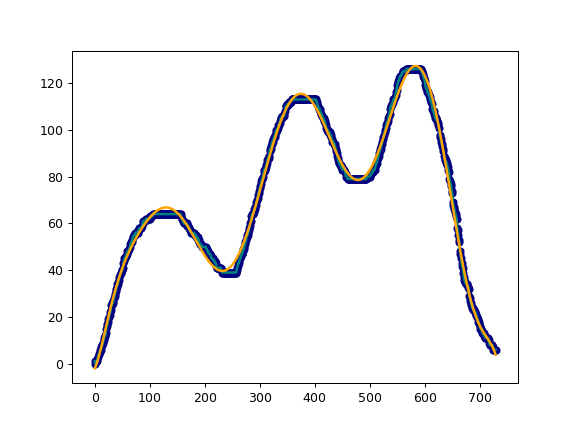

In [4]:
degree = 12

# shuffle x and y
random_order = np.random.permutation(len(x))
X_train = x[random_order][:, np.newaxis]
Y_train = y[random_order]

# Train model
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X_train, Y_train)

from matplotlib import pyplot as plt
# to keep the order
x_orig = np.copy(x)
y_orig = np.copy(y)

X_test = x_orig[:, np.newaxis]
Y_test = y_orig

plt.figure()
plt.plot(X_test, Y_test,
         color='teal',
         linewidth=2,
         label="ground truth")
plt.scatter(x_orig, y_orig,
            color='navy',
            s=30,
            marker='o',
            label="training points")
Y_pred = model.predict(X_test)
plt.plot(X_test, Y_pred, color='orange', linewidth=2,
         label="degree %d" % degree)
plt.show()